## SVM Linear Kernel
(Метод опорных векторов на линейном ядре)

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

In [3]:
X, y = datasets.make_classification(n_features=2, n_classes=2, n_informative=2, n_samples=500,
                                    n_redundant=0, n_clusters_per_class=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
class SVM:
    def __init__(self):
        self.weights = []
        self.margine = []
        self.train_score = []
        
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        w = np.ones((X.shape[1]))
        y = np.where(y == 0, -1, 1)
        
        for i in range(75):
            margine = y * X.dot(w)
            self.weights.append(w.copy())
            self.margine.append(margine)
 
            for j in range(len(margine)):
                if margine[j] >= 1:
                    w -= 0.01 * 0.001 * w
                elif margine[j] < 1:
                    w -= 0.01 * (0.001 * w - X[j].T.dot(y[j]))
                    
        self.train_score.append(self.score(self.predict(X[:, 1:]), y))
            
    def predict(self, X):    
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        y = X.dot(self.weights[-1])
        labels = np.where(y < 0, 0, 1)
        return labels
    
    def score(self, predicted, y):
        return np.sum(predicted == y) / len(y)
    
    def logloss(self, p, y):
        return -np.mean(y * np.log(p))

In [6]:
clf = SVM()
clf.fit(X_train, y_train)

In [7]:
predicted = clf.predict(X_test)
print(clf.score(predicted, y_test))

1.0


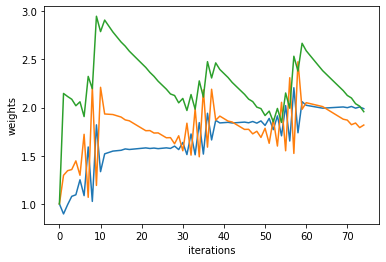

In [8]:
plt.plot(clf.weights)
plt.ylabel("weights")
plt.xlabel("iterations")
plt.show()

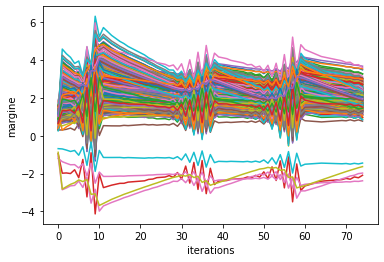

In [9]:
plt.plot(clf.margine)
plt.ylabel("margine")
plt.xlabel("iterations")
plt.show()

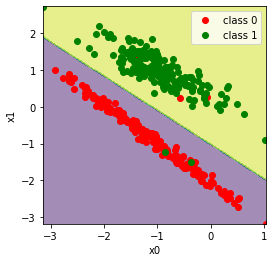

<Figure size 432x288 with 0 Axes>

In [10]:
def back_ground(model, X):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    
    step = 200

    xx, yy = np.meshgrid(np.arange(x_min, x_max + (x_max-x_min) / step, (x_max-x_min) / step),
                         np.arange(y_min, y_max + (y_max-y_min) / step, (y_max-y_min) / step))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)    
    
    return xx, yy, Z

X = X_train.copy()
y = y_train.copy()

xx, yy, Z = back_ground(clf, X)

fig, axs = plt.subplots(figsize=(4, 4))

plt.plot(X[y==0, 0], X[y==0, 1], "or", label="class 0")
plt.plot(X[y==1, 0], X[y==1, 1], "og", label="class 1")

plt.contourf(xx, yy, Z, alpha=0.5)
plt.legend()
plt.xlabel("x0")
plt.ylabel("x1")

plt.show()
plt.savefig("classification.png")